# <font color=darkblue> Machine Learning model deployment with Flask framework on Heroku</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with flask framework on heroku.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the dataset

In [10]:
df=pd.read_csv('car+data.csv')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Check the shape and basic information of the dataset.

In [9]:
print(df.shape)
df.info()

(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [11]:
# Check if there are any duplicate records in the dataset? If any, drop them.
def ifDuplicateSamples(data):
  dd = data.duplicated().sum()
  if dd == 0:
    print("There are no duplicate rows")
    return
  else:
    print("There are ",dd,"duplicate rows")

#running it on current data
ifDuplicateSamples(df)

There are  2 duplicate rows


In [12]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [14]:
# dropping duplicate records
df.drop_duplicates(inplace=True)

In [15]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis.

In [17]:
# Checking the number of unique element to identify the redundant column
print('Unique elements in Seller_Type are',df['Seller_Type'].nunique())
print('Unique elements in Fuel_Type are',df['Fuel_Type'].nunique())
print('Unique elements in Transmission are',df['Transmission'].nunique())
print('Unique elements in Owner are',df['Owner'].nunique())
print('Unique elements in Year are',df['Year'].nunique())
print('Unique elements in Car_Name are',df['Car_Name'].nunique())

Unique elements in Seller_Type are 2
Unique elements in Fuel_Type are 3
Unique elements in Transmission are 2
Unique elements in Owner are 3
Unique elements in Year are 16
Unique elements in Car_Name are 98


In [25]:
# Checking the number of unique element to identify the redundant column
ndf = df.drop(['Car_Name'],axis=1)
ndf.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [26]:
ndf['age_of_the_car'] = 2022 - ndf['Year']
ndf.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [27]:
ndf.drop('Year',axis=1,inplace=True)
ndf.head(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


### 7. Encode the categorical columns

In [28]:
# Converting the categorical features into one hot encoded using dummies and drop the original column
ndf = pd.get_dummies(ndf,drop_first=True)
ndf.head(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_the_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


### 8. Separate the target and independent features.

In [30]:
# Assigning the independent features to 'x' and dependent features to 'y'
x = ndf.iloc[:,1:]
y = ndf.iloc[:,0]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

### 9. Split the data into train and test.

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [32]:
x_train.shape

(239, 8)

In [33]:
x_test.shape

(60, 8)

### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [140]:
from sklearn.ensemble import ExtraTreesRegressor
TreeModel = ExtraTreesRegressor()
TreeModel.fit(x,y)
TreeModel_FI=TreeModel.feature_importances_
TreeModel_FI

array([0.42807391, 0.0383259 , 0.00121679, 0.08735949, 0.08335297,
       0.02131123, 0.2463898 , 0.09396991])

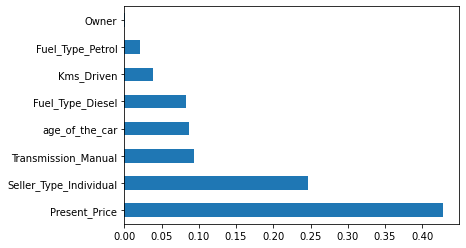

In [152]:
feat_importances = pd.Series(TreeModel_FI, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [153]:
dfi = pd.DataFrame()
dfi.loc[:,'feature'] = pd.DataFrame(list(x))
dfi.insert(loc=1, column="feature_importances", value=list(TreeModel_FI))
dfi

,feature,feature_importances
0,Present_Price,0.428074
1,Kms_Driven,0.038326
2,Owner,0.001217
3,age_of_the_car,0.087359
4,Fuel_Type_Diesel,0.083353
5,Fuel_Type_Petrol,0.021311
6,Seller_Type_Individual,0.246390
7,Transmission_Manual,0.093970


In [155]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Random Forest Score on Training set is 0.945997481217628
Random Forest Score on Test Set is 0.8080959355115664
[0.91195529 0.63061051 0.87940666 0.85148811 0.66696876]
Accuracy: 78.81 %
Standard Deviation: 11.59 %
Mean Absolute Error: 1.1871856677095607
Mean Squared Error: 9.067283730720881
RMSE: 3.0111930743014272
The r2_score is 0.8080959355115664


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


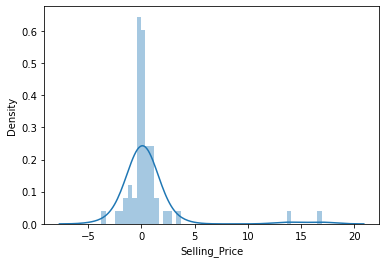

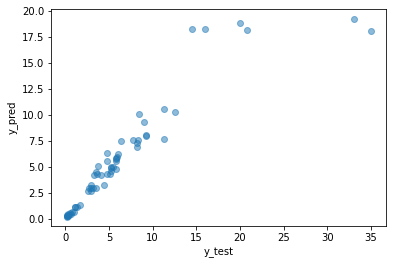

In [157]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
car_pred = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
car_pred.fit(x_train, y_train)
y_pred=car_pred.predict(x_test)

print("Random Forest Score on Training set is",car_pred.score(x_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",car_pred.score(x_test, y_test))#Testing Accuracy

accuracies = cross_val_score(car_pred, x_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### 11. Create a pickle file with an extension as .pkl

In [158]:
import pickle
pickle.dump(car_pred, open("car_pred.pkl", "wb"))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
    <link rel="stylesheet" href="/static/main.css">
    <style>@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400&display=swap');</style>
</head>

<body>
<div class="container">
    <div class="container-wrapper">
        <form action="{{ url_for('predict')}}" method="post">
            <h2  class="text_center" >Predictive analysis</h2>
            <h3>Year</h3>
            <input id="first" name="Year" type="number ">
            <h3>What is the Showroom Price?(In lakhs)</h3><input id="second" name="Present_Price" required="required">
            <h3>How Many Kilometers Drived?</h3><input id="third" name="Kms_Driven" required="required">
            <h3>How much owners previously had the car(0 or 1 or 3) ?</h3><input id="fourth" name="Owner" required="required">
            <h3>What Is the Fuel type?</h3><select name="Fuel_Type_Petrol" id="fuel" required="required">
                <option value="Petrol">Petrol</option>
                <option value="Diesel">Diesel</option>
                <option value="CNG">CNG</option>
            </select>
            <h3>Are you A Dealer or Individual</h3><select name="Seller_Type_Individual" id="resea" required="required">
                <option value="Dealer">Dealer</option>
                <option value="Individual">Individual</option>
            </select>

            <h3>Transmission type</h3><select name="Transmission_Mannual" id="research" required="required">
                <option value="Mannual">Manual Car</option>
                <option value="Automatic">Automatic Car</option>
            </select>
         
            <div class="submit-button">
                <button id="sub" type="submit ">Calculate the Selling Price</button>
            </div>
           
        </form>
        
    </div>
    <h3 class="text_center">{{ prediction_text }}<h3></h3>
</div>

</body>

</html>

### b) Create app.py file and write the predict function

In [ ]:
from flask import Flask, render_template, request
import pickle
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

app = Flask(__name__,static_url_path='/static')

model = pickle.load(open('car_pred.pkl', 'rb'))
@app.route('/',methods=['GET'])
def Home():
    return render_template('index.html')


standard_to = StandardScaler()
@app.route("/predict", methods=['POST'])
def predict():
    Fuel_Type_Diesel=0
    if request.method == 'POST':
        Year = int(request.form['Year'])
        Present_Price=float(request.form['Present_Price'])
        Kms_Driven=int(request.form['Kms_Driven'])
        Kms_Driven2=np.log(Kms_Driven)
        Owner=int(request.form['Owner'])
        Fuel_Type_Petrol=request.form['Fuel_Type_Petrol']
        if(Fuel_Type_Petrol=='Petrol'):
            Fuel_Type_Petrol=1
            Fuel_Type_Diesel=0
        elif(Fuel_Type_Petrol=='Diesel'):
            Fuel_Type_Petrol=0
            Fuel_Type_Diesel=1
        else:
            Fuel_Type_Petrol=0
            Fuel_Type_Diesel=0
        Year=2022-Year
        Seller_Type_Individual=request.form['Seller_Type_Individual']
        if(Seller_Type_Individual=='Individual'):
            Seller_Type_Individual=1
        else:
            Seller_Type_Individual=0	
        Transmission_Mannual=request.form['Transmission_Mannual']
        if(Transmission_Mannual=='Mannual'):
            Transmission_Mannual=1
        else:
            Transmission_Mannual=0
        prediction=model.predict([[Present_Price,Kms_Driven2,Owner,Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Mannual]])
        output=round(prediction[0],2)
        if output<0:
            return render_template('index.html',prediction_texts="Sorry you cannot sell this car")
        else:
            return render_template('index.html',prediction_text="You Can Sell The Car at {}".format(output))
    else:
        return render_template('index.html')

if __name__=="__main__":
    port = int(os.environ.get('PORT', 33507))
    app.run(debug=True,port=port)

### 13. Deploy your app on Heroku. (write commands for deployment)

In [ ]:
If you haven't already, log in to your Heroku account and follow the prompts to create a new SSH public key.

$ heroku login
Clone the repository
Use Git to clone car-price-predictor-satya-app's source code to your local machine.

$ heroku git:clone -a car-price-predictor-satya-app 
$ cd car-price-predictor-satya-app
Deploy your changes
Make some changes to the code you just cloned and deploy them to Heroku using Git.

$ git add .
$ git commit -am "make it better"
$ git push heroku master

### 14. Paste the URL of the heroku application below, and while submitting the solution submit this notebook along with the source code.

https://car-price-predictor-satya-app.herokuapp.com/

### Happy Learning :)